In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
import requests
import os
from pprint import pprint
from numpy import disp

In [3]:
movie_data=pd.read_csv("movieData.csv")
movie_data=movie_data.dropna(subset = ['Genre', 'Country'])
# movie_data.to_csv('movie_data_stuff2.csv', index=False)
display(movie_data)

,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Runtime (min),Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,NaN,"Biography, Crime, Drama",94.0,7.8,95%,United States,"English, Italian, Latin, Spanish, German",209 min
1,1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,NaN,"Action, Biography, Drama",NaN,8.3,88%,"India, United States","Hindi, English",161 min
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,NaN,"Documentary, Biography",72.0,8.9,96%,United Kingdom,English,83 min
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,NaN,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom","Hindi, English",224 min
4,4,5,Roma,2018,18+,1,0,0,0,0,R,NaN,Drama,96.0,7.7,96%,"Mexico, United States","Spanish, Mixtec, English, Japanese, German, Fr...",135 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9342,9342,9343,Walt & El Grupo,2008,7+,0,0,0,1,0,PG,NaN,"Biography, Drama",NaN,5.9,17%,United States,"English, Spanish",107 min
9352,9352,9353,Own the Room,2021,7+,0,0,0,1,0,TV-PG,NaN,Documentary,68.0,6.5,100%,United States,English,91 min
9366,9366,9367,Sacred Planet,2004,all,0,0,0,1,0,G,NaN,"Documentary, Short",53.0,6.0,58%,"Canada, Malaysia, United States",English,40 min
9370,9370,9371,Unidentified Flying Oddball,1979,all,0,0,0,1,0,G,NaN,"Adventure, Comedy, Family",66.0,5.1,66/100,United States,English,93 min


In [4]:
# movie_data['Netflix'] = movie_data['Netflix'].replace(1, 'Netflix')
# movie_data['Prime Video'] = movie_data['Prime Video'].replace(1, 'Prime Video')
# movie_data['Hulu'] = movie_data['Hulu'].replace(1, 'Hulu')
# movie_data['Disney+'] = movie_data['Disney+'].replace(1, 'Disney+')
# display(movie_data)

In [5]:
movie_data['Runtime'] = movie_data['Runtime'].str.replace("min", "")
movie_data = movie_data.drop("Runtime (min)", axis = 1)
movie_data["Runtime"] = movie_data['Runtime'].astype(float)
movie_data['Rotten Tomatoes'] = movie_data['Rotten Tomatoes'].str.rstrip("%")
movie_data['Rotten Tomatoes'] = movie_data['Rotten Tomatoes'].str.replace('/100',"")

# convert 'Runtime (min)' and RotTom columns and convert to float
#movie_data['Runtime (min)'] = movie_data['Runtime'].astype(float)
movie_data['Rotten Tomatoes'] = movie_data['Rotten Tomatoes'].astype(float)

# multiply imbd score by 10 to place on same scale as other scores
# check_df = movie_data[movie_data['Imdb'] == -1]
# check_df
movie_data['Imdb'] = movie_data['Imdb'] * 10

# average of scores/ratings
movie_data['Overall'] = movie_data[['Metascore', 'Imdb', 'Rotten Tomatoes']].mean(axis=1, numeric_only=True, skipna=True).round(3)
movie_data


,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime,Overall
0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0,89.000
1,1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,85.500
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,89.0,96.0,United Kingdom,English,83.0,85.667
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,81.0,95.0,"India, United States, United Kingdom","Hindi, English",224.0,86.667
4,4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,77.0,96.0,"Mexico, United States","Spanish, Mixtec, English, Japanese, German, Fr...",135.0,89.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9342,9342,9343,Walt & El Grupo,2008,7+,0,0,0,1,0,PG,"Biography, Drama",NaN,59.0,17.0,United States,"English, Spanish",107.0,38.000
9352,9352,9353,Own the Room,2021,7+,0,0,0,1,0,TV-PG,Documentary,68.0,65.0,100.0,United States,English,91.0,77.667
9366,9366,9367,Sacred Planet,2004,all,0,0,0,1,0,G,"Documentary, Short",53.0,60.0,58.0,"Canada, Malaysia, United States",English,40.0,57.000
9370,9370,9371,Unidentified Flying Oddball,1979,all,0,0,0,1,0,G,"Adventure, Comedy, Family",66.0,51.0,66.0,United States,English,93.0,61.000


In [6]:
plat_runtime = movie_data.reset_index()
rated_runtime = plat_runtime.groupby(['Rating']).mean()[['Runtime']]
rated_runtime = rated_runtime.reset_index()
print(rated_runtime.columns)

# Netflix
groupbyMeanNetflix = plat_runtime.groupby(["Netflix"])["Runtime"].mean()
summaryNetflixStats = {"Runtime Average Netflix": groupbyMeanNetflix}
summaryNetflixStatsDF = pd.DataFrame(summaryNetflixStats)

# Hulu
groupbyMeanHulu = plat_runtime.groupby(["Hulu"])["Runtime"].mean()
summaryHuluStats = {"Runtime Average Hulu": groupbyMeanHulu}
summaryHuluStatsDF = pd.DataFrame(summaryHuluStats)
summaryHuluStatsDF = summaryHuluStatsDF.drop([0], axis=0)

# Prime Video
groupbyMeanPrime = plat_runtime.groupby(["Prime Video"])["Runtime"].mean()
summaryPrimeStats = {"Runtime Average Prime Video": groupbyMeanPrime}
summaryPrimeStatsDF = pd.DataFrame(summaryPrimeStats)
summaryPrimeStatsDF = summaryPrimeStatsDF.drop([0], axis=0)

# Disney+
groupbyMeanDisney = plat_runtime.groupby(["Disney+"])["Runtime"].mean()
summaryDisneyStats = {"Runtime Average Disney": groupbyMeanDisney}
summaryDisneyStatsDF = pd.DataFrame(summaryDisneyStats)
summaryDisneyStatsDF = summaryDisneyStatsDF.drop([0], axis=0)

# merge all the summary stats per platform
resetNetflixIndex = summaryNetflixStatsDF.rename(index={'Netflix': ''})
mergeNHDF = summaryNetflixStatsDF.merge(summaryHuluStatsDF, left_on='Netflix', right_index = True)
mergeNHPDF = mergeNHDF.merge(summaryPrimeStatsDF, left_on ='Netflix', right_index = True)
mergeAllDF = mergeNHPDF.merge(summaryDisneyStatsDF, left_on ='Netflix', right_index = True)
mergeAllDF.index.name = None
display(mergeAllDF)


Index(['Rating', 'Runtime'], dtype='object')


,Runtime Average Netflix,Runtime Average Hulu,Runtime Average Prime Video,Runtime Average Disney
1,104.84683,102.604651,103.131533,97.675


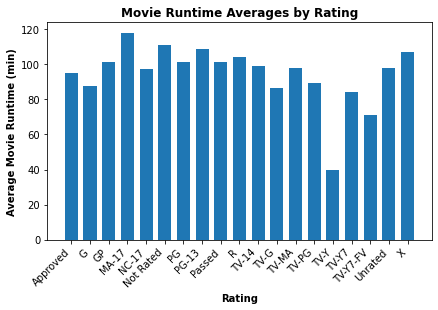

In [7]:
# runtime by platform charts
# Tell matplotlib that we will be making a bar chart
# average movie runtime is our y-axis and x-axis is ratings
# make a list of ratings
rating_list = rated_runtime["Rating"].tolist()
rating_list
x_axis_rating_list = np.arange(len(rating_list))
# Create ticks for our bar chart's x-values
tick_locations_ratings = [value for value in x_axis_rating_list]
plt.xticks(tick_locations_ratings, rating_list, rotation = 45, va = 'top', ha = 'right')
# plot bar chart
plt.bar(x_axis_rating_list, rated_runtime["Runtime"], align="center", width = 0.7)
plt.tight_layout()
# Give our chart some labels and a tile
plt.title("Movie Runtime Averages by Rating", fontweight='bold', fontsize=12)
plt.xlabel("Rating", fontweight='bold', fontsize=10)
plt.ylabel("Average Movie Runtime (min)",  fontweight='bold', fontsize=10)
plt.savefig("movie_runtime_averages_by_rating.png", bbox_inches="tight")

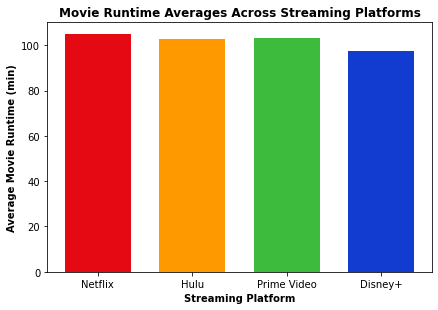

In [8]:
# runtime by platform charts
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

platformList = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
x_axis = np.arange(len(platformList))
runtime = mergeAllDF.squeeze()

# Create ticks for our bar chart's x-values
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, platformList)

# plot bar chart
plt.bar(x_axis, runtime, color= ['#e50914', '#ff9900', '#3dbb3d', '#113ccf'], align="center", width = 0.7)
plt.tight_layout()

# Give our chart some labels and a tile
plt.title("Movie Runtime Averages Across Streaming Platforms", fontweight='bold', fontsize=12)
plt.xlabel("Streaming Platform", fontweight='bold', fontsize=10)
plt.ylabel("Average Movie Runtime (min)",  fontweight='bold', fontsize=10)
plt.savefig("movie_runtime_averages_across_streaming_platforms.png", bbox_inches="tight")

In [9]:
# # average ratings by platform 
# groupbyMeanMetascoreNetflix = movie_data.groupby(["Netflix"])["Metascore"].mean()
# summaryNetflixMetascoreStats = {"Metascore Average Netflix": groupbyMeanMetascoreNetflix}
# summaryNetflixMetascoreStats = pd.DataFrame(summaryNetflixMetascoreStats)

# groupbyMeanImdbNetflix = movie_data.groupby(["Netflix"])["Imdb"].mean()
# summaryNetflixImdbStats = {"Imdb Average Netflix": groupbyMeanImdbNetflix}
# summaryNetflixImdbStats = pd.DataFrame(summaryNetflixImdbStats)

# # movie_data['Rotten Tomatoes']=movie_data['Rotten Tomatoes'].str.rstrip("%")
# # movie_data['Rotten Tomatoes']=movie_data['Rotten Tomatoes'].str.replace('/100',"")
# # movie_data["Rotten Tomatoes"] = movie_data['Rotten Tomatoes'].astype(float)


# groupbyMeanRottenTomatoesNetflix = movie_data.groupby(["Netflix"])["Rotten Tomatoes"].mean()
# summaryNetflixRottenTomatoesStats = {"Rotten Tomatoes Average Netflix": groupbyMeanRottenTomatoesNetflix}
# summaryNetflixRottenTomatoesStats = pd.DataFrame(summaryNetflixRottenTomatoesStats)

# groupbyMeanMetascoreHulu = movie_data.groupby(["Hulu"])["Metascore"].mean()
# summaryHuluMetascoreStats = {"Metascore Average Hulu": groupbyMeanMetascoreHulu}
# summaryHuluMetascoreStats = pd.DataFrame(summaryHuluMetascoreStats)
# summaryHuluMetascoreStats = summaryHuluMetascoreStats.drop([0], axis =0)

# groupbyMeanImdbHulu = movie_data.groupby(["Hulu"])["Imdb"].mean()
# summaryHuluImdbStats = {"Imdb Average Hulu": groupbyMeanImdbHulu}
# summaryHuluImdbStats = pd.DataFrame(summaryHuluImdbStats)
# summaryHuluImdbStats = summaryHuluImdbStats.drop([0], axis =0)

# groupbyMeanRottenTomatoesHulu = movie_data.groupby(["Hulu"])["Rotten Tomatoes"].mean()
# summaryHuluRottenTomatoesStats = {"Rotten Tomatoes Average Hulu": groupbyMeanRottenTomatoesHulu}
# summaryHuluRottenTomatoesStats = pd.DataFrame(summaryHuluRottenTomatoesStats)
# summaryHuluRottenTomatoesStats = summaryHuluRottenTomatoesStats.drop([0], axis =0)

# groupbyMeanMetascorePrimeVideo = movie_data.groupby(["Prime Video"])["Metascore"].mean()
# summaryPrimeVideoMetascoreStats = {"Metascore Average Prime Video": groupbyMeanMetascorePrimeVideo}
# summaryPrimeVideoMetascoreStats = pd.DataFrame(summaryPrimeVideoMetascoreStats)
# summaryPrimeVideoMetascoreStats = summaryPrimeVideoMetascoreStats.drop([0], axis =0)

# groupbyMeanImdbPrimeVideo = movie_data.groupby(["Prime Video"])["Imdb"].mean()
# summaryPrimeVideoImdbStats = {"Imdb Average Prime Video": groupbyMeanImdbPrimeVideo}
# summaryPrimeVideoImdbStats = pd.DataFrame(summaryPrimeVideoImdbStats)
# summaryPrimeVideoImdbStats = summaryPrimeVideoImdbStats.drop([0], axis =0)

# groupbyMeanRottenTomatoesPrimeVideo = movie_data.groupby(["Prime Video"])["Rotten Tomatoes"].mean()
# summaryPrimeVideoRottenTomatoesStats = {"Rotten Tomatoes Average Prime Video": groupbyMeanRottenTomatoesPrimeVideo}
# summaryPrimeVideoRottenTomatoesStats = pd.DataFrame(summaryPrimeVideoRottenTomatoesStats)
# summaryPrimeVideoRottenTomatoesStats = summaryPrimeVideoRottenTomatoesStats.drop([0], axis =0)

# groupbyMeanMetascoreDisney = movie_data.groupby(["Disney+"])["Metascore"].mean()
# summaryDisneyMetascoreStats = {"Metascore Average Disney+": groupbyMeanMetascoreDisney}
# summaryDisneyMetascoreStats = pd.DataFrame(summaryDisneyMetascoreStats)
# summaryDisneyMetascoreStats = summaryDisneyMetascoreStats.drop([0], axis =0)

# groupbyMeanImdbDisney = movie_data.groupby(["Disney+"])["Imdb"].mean()
# summaryDisneyImdbStats = {"Imdb Average Disney+": groupbyMeanImdbDisney}
# summaryDisneyImdbStats = pd.DataFrame(summaryDisneyImdbStats)
# summaryDisneyImdbStats = summaryDisneyImdbStats.drop([0], axis =0)

# groupbyMeanRottenTomatoesDisney = movie_data.groupby(["Disney+"])["Rotten Tomatoes"].mean()
# summaryDisneyRottenTomatoesStats = {"Rotten Tomatoes Average Disney+": groupbyMeanRottenTomatoesDisney}
# summaryDisneyRottenTomatoesStats = pd.DataFrame(summaryDisneyRottenTomatoesStats)
# summaryDisneyRottenTomatoesStats = summaryDisneyRottenTomatoesStats.drop([0], axis =0)

# mergeNetflixRatings = summaryNetflixMetascoreStats.merge(summaryNetflixImdbStats, left_on='Netflix', right_index = True)
# mergeNetflixRatings = mergeNetflixRatings.merge(summaryNetflixRottenTomatoesStats, left_on='Netflix', right_index = True)

# mergeHuluRatings = summaryHuluMetascoreStats.merge(summaryHuluImdbStats, left_on='Hulu', right_index = True)
# mergeHuluRatings = mergeHuluRatings.merge(summaryHuluRottenTomatoesStats, left_on='Hulu', right_index = True)

# mergePrimeVideoRatings = summaryPrimeVideoMetascoreStats.merge(summaryPrimeVideoImdbStats, left_on='Prime Video', right_index = True)
# mergePrimeVideoRatings = mergePrimeVideoRatings.merge(summaryPrimeVideoRottenTomatoesStats, left_on='Prime Video', right_index = True)

# mergeDisneyRatings = summaryDisneyMetascoreStats.merge(summaryDisneyImdbStats, left_on='Disney+', right_index = True)
# mergeDisneyRatings = mergeDisneyRatings.merge(summaryDisneyRottenTomatoesStats, left_on='Disney+', right_index = True)

# mergeNHPDRatings = mergeNetflixRatings.merge(mergeHuluRatings, left_on='Netflix', right_index = True)
# mergeNHPDRatings = mergeNHPDRatings.merge(mergePrimeVideoRatings, left_on='Netflix', right_index = True)
# mergeNHPDRatings = mergeNHPDRatings.merge(mergeDisneyRatings, left_on='Netflix', right_index = True)
# mergeNHPDRatings =mergeNHPDRatings.reset_index()
# mergeNHPDRatings

,Film rating system,Netflix,Prime Video,Hulu,Disney+
0,Metascore,58.542192,54.780773,60.840000,60.840000
1,Imdb,64.247960,62.454492,65.556818,65.556818
2,Rotten Tomatoes,64.818581,59.058720,63.843182,63.843182


Film rating system,Metascore,Imdb,Rotten Tomatoes
Netflix,58.542192,64.24796,64.818581
Prime Video,54.780773,62.454492,59.05872
Hulu,60.84,65.556818,63.843182
Disney+,60.84,65.556818,63.843182


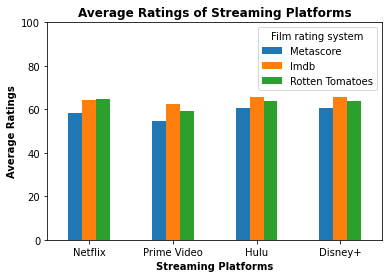

In [10]:
score=movie_data[['Year',"Netflix", "Prime Video", "Hulu", "Disney+",'Metascore','Imdb','Rotten Tomatoes']]
netflix_score=score[score['Netflix']>0]
netflix_score=netflix_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
netflix_scoredf=pd.DataFrame({'Film rating system':netflix_score['index'],'Netflix':netflix_score[0]})
netflix_scoredf

prime_score=score[score['Prime Video']>0]
prime_score=prime_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
prime_scoredf=pd.DataFrame({'Film rating system':prime_score['index'],'Prime Video':prime_score[0]})

hulu_score=score[score['Disney+']>0]
hulu_score=hulu_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
hulu_scoredf=pd.DataFrame({'Film rating system':hulu_score['index'],'Hulu':hulu_score[0]})

disney_score=score[score['Disney+']>0]
disney_score=disney_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
disney_scoredf=pd.DataFrame({'Film rating system':disney_score['index'],'Disney+':disney_score[0]})

score_by_platform=pd.merge(netflix_scoredf,prime_scoredf,how='left',on='Film rating system')
score_by_platform=pd.merge(score_by_platform,hulu_scoredf,how='left',on='Film rating system')
score_by_platform=pd.merge(score_by_platform,disney_scoredf,how='left',on='Film rating system')
display(score_by_platform)

ratingpivot=pd.DataFrame(score_by_platform.transpose())
new_header = ratingpivot.iloc[0] #grab the first row for the header
ratingpivot = ratingpivot[1:] #take the data less the header row
ratingpivot.columns = new_header #set the header row as the df header
display(ratingpivot)

ratingpivot.plot.bar()
plt.xticks(rotation = 0)
plt.ylim((0, 100))
plt.xlabel("Streaming Platforms", fontweight='bold', fontsize=10)
plt.ylabel("Average Ratings", fontweight='bold', fontsize=10)
plt.title("Average Ratings of Streaming Platforms", fontweight='bold', fontsize=12)
plt.savefig("average_ratings_of_streaming_platforms.png", bbox_inches="tight")

In [11]:
# dataframe to split and explode by genre
df_to_split = movie_data.reset_index()
df_to_split_gen = df_to_split
df_to_split_gen['Genre'] = df_to_split_gen['Genre'].astype(str)
df_to_split_gen['Genre Type'] = df_to_split_gen['Genre'].str.strip(' ')
df_to_split_gen['Genre Type'] = df_to_split_gen['Genre'].str.split(', ')
#init_list = df_to_split['Genre Type']
#res = df_to_split['Genre Type'].apply(literal_eval)
#df_to_split['Genre Type'] = df_to_split['Genre Type'].apply(ast.literal_eval)
df_to_split_gen = df_to_split_gen.explode('Genre Type')
df_to_split_gen.to_csv('df_to_split_gen.csv', index=False)

# dataframe to split and explode by country
df_to_split_cty = movie_data.reset_index()
df_to_split_cty['Country'] = df_to_split_cty['Country'].astype(str)
df_to_split_cty['Countries'] = df_to_split_cty['Country'].str.strip(' ')
df_to_split_cty['Countries'] = df_to_split_cty['Country'].str.split(', ')
df_to_split_cty = df_to_split_cty.explode('Countries')
# replace instances of "USA" to "United States"
df_to_split_cty.loc[df_to_split_cty['Countries'] == 'USA', 'Countries'] = 'United States'
df_to_split_cty = df_to_split_cty.set_index('ID')
df_to_split_cty.to_csv('df_to_split_cty.csv', index=False)
df_to_split_cty

,index,Unnamed: 0,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime,Overall,Countries
ID,,,,,,,,,,,,,,,,,,,,
1,0,0,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0,89.000,United States
2,1,1,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,85.500,India
2,1,1,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,85.500,United States
3,2,2,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,89.0,96.0,United Kingdom,English,83.0,85.667,United Kingdom
4,3,3,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,81.0,95.0,"India, United States, United Kingdom","Hindi, English",224.0,86.667,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,9366,9366,Sacred Planet,2004,all,0,0,0,1,0,G,"Documentary, Short",53.0,60.0,58.0,"Canada, Malaysia, United States",English,40.0,57.000,Canada
9367,9366,9366,Sacred Planet,2004,all,0,0,0,1,0,G,"Documentary, Short",53.0,60.0,58.0,"Canada, Malaysia, United States",English,40.0,57.000,Malaysia
9367,9366,9366,Sacred Planet,2004,all,0,0,0,1,0,G,"Documentary, Short",53.0,60.0,58.0,"Canada, Malaysia, United States",English,40.0,57.000,United States


In [12]:
cty_scores = df_to_split_cty.groupby(['Countries']).mean()[['Metascore', 'Imdb', 'Rotten Tomatoes']].round(3)
cty_scores['Overall'] = cty_scores[['Metascore', 'Imdb', 'Rotten Tomatoes']].mean(axis=1, numeric_only=True, skipna=True).round(3)
#cty_scores['Total Country Instances'] = df_to_split_cty['Countries'].value_counts()
#cty_scores['# of Scores'] = cty_scores
cty_scores = cty_scores.fillna('-')
cty_scores = cty_scores.sort_values(['Overall'], ascending=False).reset_index()
cty_scores


,Countries,Metascore,Imdb,Rotten Tomatoes,Overall
0,Soviet Union,97.0,80.0,100.0,92.333
1,The Democratic Republic of Congo,95.0,73.5,100.0,89.500
2,North Macedonia,85.0,80.0,100.0,88.333
3,Peru,-,75.0,100.0,87.500
4,Ghana,93.0,64.0,100.0,85.667
...,...,...,...,...,...
90,Puerto Rico,29.5,49.5,18.5,32.500
91,Aruba,37.0,49.0,10.0,32.000
92,Syria,-,57.0,0.0,28.500
93,Kazakhstan,-,57.0,0.0,28.500


In [13]:

# movie_datadf= pd.DataFrame({ 
#                            "Title": movie_data['Title'],
#                            "Year":movie_data['Year'].astype(int),
#                            "Netflix":movie_data['Netflix'],
#                            "Hulu":movie_data['Hulu'],
#                            'Prime Video':movie_data['Prime Video'],
#                            'Disney+':movie_data['Disney+'],
#                            'Rating':movie_data['Rating'],
#                            'Genre1':movie_data['Genre1'],
#                            'Genre2':movie_data['Genre2'],
#                            'Genre3':movie_data['Genre3'],
#                            'Genre4':movie_data['Genre4'],
#                            'Genre5':movie_data['Genre5'],
#                            'Genre6':movie_data['Genre6'],
#                            'Genre7':movie_data['Genre7'],
#                            'Metascore':movie_data['Metascore'],
#                            'Imdb':movie_data['Imdb'],
#                            'Rotten Tomatoes':movie_data['Rotten Tomatoes'],
#                            'Runtime (min)':movie_data['Runtime'].astype(float),
#                            'Country1':movie_data['Country1'],
#                            'Country2':movie_data['Country2'],
#                            'Country3':movie_data['Country3'],
#                            'Country4':movie_data['Country4'],
#                            'Country5':movie_data['Country5'],
#                            'Country6':movie_data['Country6'],
#                            'Country7':movie_data['Country7'],
#                            'Country8':movie_data['Country8'],
#                            'Country9':movie_data['Country9'],
#                            'Country10':movie_data['Country10'],
#                            'Country11':movie_data['Country11'],
#                            'Country12':movie_data['Country12'],
#                            'Country13':movie_data['Country13'],
#                            'Country14':movie_data['Country14'],
#                            'Country15':movie_data['Country15']
#                             })

# # pd.set_option('display.max_rows', 800)
# movie_datadf.Imdb = movie_datadf.Imdb * 10
# movie_datadf.sample(10)

In [14]:
# dfs_genre = []
# for i in range(7):
#     genre_df = str('genre_set' + str(i + 1))
#     genre_col = str('Genre' + str(i + 1))
#     genre_df = movie_datadf[[genre_col,'Netflix', 'Prime Video', 'Hulu', 'Disney+', 'Metascore','Imdb','Rotten Tomatoes']].copy()
#     genre_df.rename(columns = {genre_col:'Genre'}, inplace=True)
#     genre_df.reset_index()
#     genre_df = genre_df[genre_df['Genre'].notna()]
#     dfs_genre.append(genre_df)
# #for i in range(len(dfs)):
# #    print(list(dfs[i]))
# merged_df = pd.concat(dfs_genre)
# merged_df['Genre'] = merged_df['Genre'].str.strip()
# # merged_df
# # merged_df.to_csv('merged_df.csv', index=False)
# # #list(merged_df)
# avg_ratings = merged_df.groupby(['Genre']).sum()[['Netflix','Prime Video','Hulu','Disney+']]
# avg_ratings

In [15]:


# # df list for loop
# dfs_countries = []
# for i in range(15):
#     country_df = str('country_set' + str(i + 1))
#     country_col = str('Country' + str(i + 1))
#     country_df = movie_datadf[[country_col,'Netflix', 'Prime Video', 'Hulu', 'Disney+', 'Metascore','Imdb','Rotten Tomatoes']].copy()
#     country_df.rename(columns = {country_col:'Country'}, inplace=True)
#     country_df.reset_index()
#     country_df = country_df[country_df['Country'].notna()]
#     dfs_countries.append(country_df)
# #for i in range(len(dfs)):
# #    print(list(dfs[i]))
# country_merged_df = pd.concat(dfs_countries)
# country_merged_df['Country'] = country_merged_df['Country'].str.strip()

# # replace instances of "USA" to "United States"
# country_merged_df.loc[country_merged_df['Country'] == 'USA', 'Country'] = 'United States'

# # merged_df
# #country_merged_df.to_csv('merged_df.csv', index=False)
# # #list(merged_df)

In [16]:
# # to get top 20th value of platform totals column (1 less of 20 since start is 0)
n = 20

# for getting names of countires in top 20 and making rest 'not top 20'
country_top = df_to_split_cty.groupby(['Countries']).sum()[['Netflix','Prime Video','Hulu','Disney+']]
sum_cols = country_top['Netflix'] + country_top['Prime Video'] + country_top['Hulu'] + country_top['Disney+']

country_top['Platform Totals'] = sum_cols
top20_limit = country_top['Platform Totals'].nlargest(n)
top20_limit = top20_limit.min()
top20_max = country_top['Platform Totals'].max()
country_top = country_top.sort_values(['Platform Totals'], ascending=True).reset_index()
country_top['Top 20'] = 0
country_top['Top 20'].mask(country_top['Platform Totals'] >= top20_limit, country_top['Countries'], inplace=True)
country_top['Top 20'].mask(country_top['Platform Totals'] < top20_limit, 'Not Top 20', inplace=True)
country_top.reset_index()
country_top

,Countries,Netflix,Prime Video,Hulu,Disney+,Platform Totals,Top 20
0,Zimbabwe,1,0,0,0,1,Not Top 20
1,Kazakhstan,0,0,0,1,1,Not Top 20
2,Malawi,1,0,0,0,1,Not Top 20
3,Yugoslavia,0,1,0,0,1,Not Top 20
4,Ghana,1,0,0,0,1,Not Top 20
...,...,...,...,...,...,...,...
90,India,186,107,7,2,302,India
91,France,118,139,71,7,335,France
92,Canada,101,158,59,27,345,Canada
93,United Kingdom,203,266,147,47,663,United Kingdom


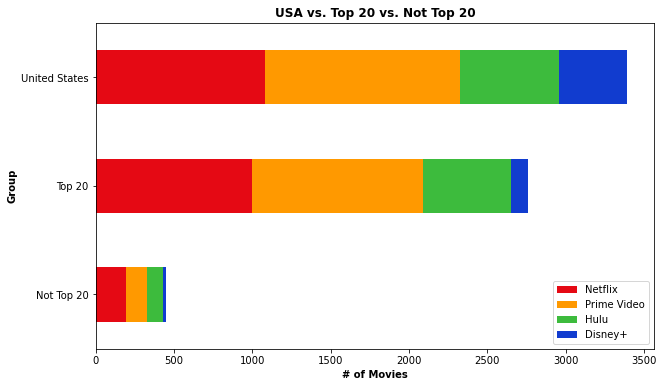

In [17]:
# for getting USA, rest of top 20 and not top 20
top_comp = df_to_split_cty.groupby(['Countries']).sum()[['Netflix','Prime Video','Hulu','Disney+']]
sum_cols = top_comp['Netflix'] + top_comp['Prime Video'] + top_comp['Hulu'] + top_comp['Disney+']

top_comp['Platform Totals'] = sum_cols
top20_limit = top_comp['Platform Totals'].nlargest(n)
top20_limit = top20_limit.min()
top20_max = top_comp['Platform Totals'].max()
top_comp = top_comp.sort_values(['Platform Totals'], ascending=True).reset_index()
top_comp['Top 20'] = 0
top_comp['Top 20'].mask(top_comp['Platform Totals'] >= top20_limit, 'Top 20', inplace=True)
top_comp['Top 20'].mask(top_comp['Platform Totals'] < top20_limit, 'Not Top 20', inplace=True)
top_comp['Top 20'].mask(top_comp['Platform Totals'] == top20_max, 'United States', inplace=True)
top_comp.reset_index()
# top_comp
top_comp = top_comp.groupby(['Top 20']).sum()[['Netflix','Prime Video','Hulu','Disney+', 'Platform Totals']]
# top_comp
top_comp[['Netflix','Prime Video','Hulu','Disney+']].plot.barh(stacked=True, rot=0, figsize=(10,6), color=['#e50914', '#ff9900', '#3dbb3d', '#113ccf'])
plt.title('USA vs. Top 20 vs. Not Top 20', fontweight='bold', fontsize=12)
plt.ylabel('Group', fontweight='bold', fontsize=10)
plt.xlabel('# of Movies', fontweight='bold', fontsize=10)
plt.savefig("USA_top_20_vs_not_20", bbox_inches="tight")
plt.show()


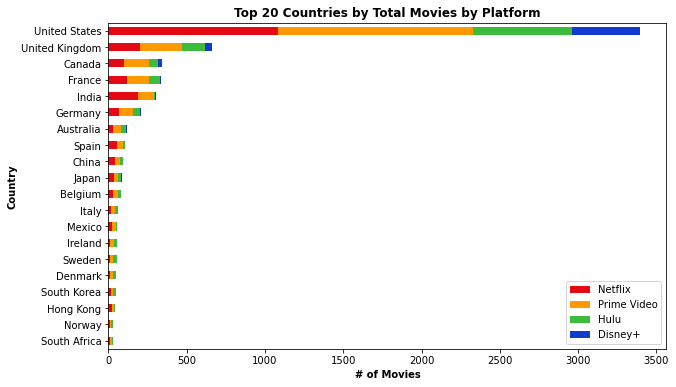

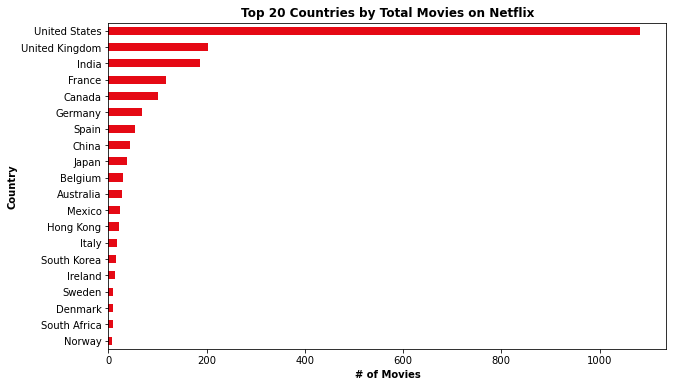

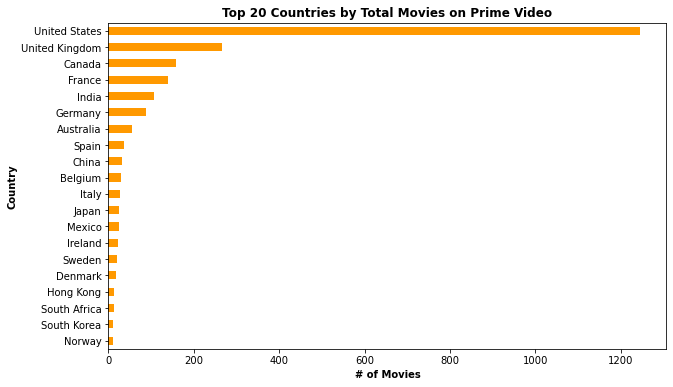

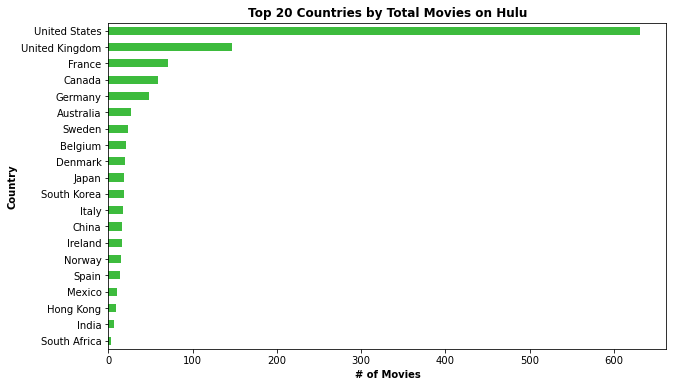

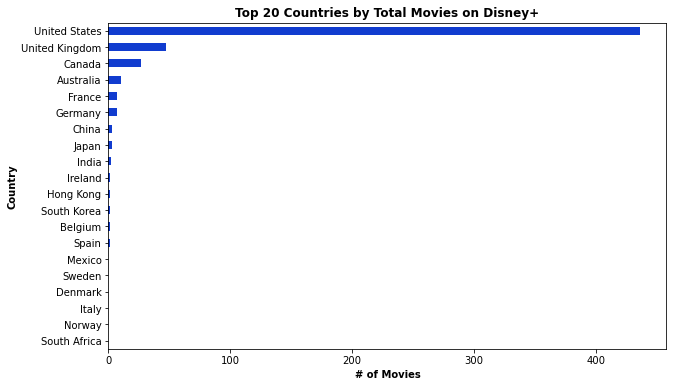

In [18]:
# top 20 countries charts
top20_df = pd.DataFrame({
    'Top Country': country_top['Top 20'],
    #'Top Country': country_count.loc[country_count['Top 20'] != 'Not Top 20'],
    'Platform Totals': country_top['Platform Totals'],
    'Netflix': country_top['Netflix'],
    'Prime Video': country_top['Prime Video'],
    'Hulu': country_top['Hulu'],
    'Disney+': country_top['Disney+']
})

# platform totals
top20_bar = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
top20_bar = top20_bar.set_index('Top Country')
top20_bar[['Netflix','Prime Video','Hulu','Disney+']].plot.barh(stacked=True, rot=0, figsize=(10,6), color=['#e50914', '#ff9900', '#3dbb3d', '#113ccf'])
plt.title('Top 20 Countries by Total Movies by Platform', fontweight='bold', fontsize=12)
plt.ylabel('Country', fontweight='bold', fontsize=10)
plt.xlabel('# of Movies', fontweight='bold', fontsize=10)
plt.savefig("top_20_bar_overall.png", bbox_inches="tight")
plt.show()

platforms = ['Netflix','Prime Video','Hulu','Disney+']
colors = ['#e50914', '#ff9900', '#3dbb3d', '#113ccf']
for i in range(4):
    platform_df = str(platforms[i])
    platform_df =top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
    platform_df = platform_df.sort_values([platforms[i]], ascending=True)
    platform_df = platform_df.set_index('Top Country')
    platform_df[platforms[i]].plot.barh(rot=0, figsize=(10,6), color=colors[i])
    plt.title(f'Top 20 Countries by Total Movies on {platforms[i]}', fontweight='bold', fontsize=12)
    plt.ylabel('Country', fontweight='bold', fontsize=10)
    plt.xlabel('# of Movies', fontweight='bold', fontsize=10)
    plt.savefig(f"{platforms[i]}.png", bbox_inches="tight")
    plt.show()

In [19]:
# # netflix
# netflix20_bar = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
# netflix20_bar = netflix20_bar.sort_values(['Netflix'], ascending=False).reset_index()
# netflix20_bar = netflix20_bar.set_index('Top Country')
# netflix20_bar['Netflix'].plot.bar(stacked=True, rot=90, figsize=(10,6), color='#e50914')
# plt.title('Top 20 Countries by Total Movies on Netflix', fontweight='bold', fontsize=12)
# plt.xlabel('Country', fontweight='bold', fontsize=10)
# plt.ylabel('# of Movies', fontweight='bold', fontsize=10)
# plt.show()

# # prime video
# prime20_bar = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
# prime20_bar = prime20_bar.sort_values(['Prime Video'], ascending=False).reset_index()
# prime20_bar = prime20_bar.set_index('Top Country')
# prime20_bar['Prime Video'].plot.bar(stacked=True, rot=90, figsize=(10,6), color='#ff9900')
# plt.title('Top 20 Countries by Total Movies on Prime Video', fontweight='bold', fontsize=12)
# plt.xlabel('Country', fontweight='bold', fontsize=10)
# plt.ylabel('# of Movies', fontweight='bold', fontsize=10)
# plt.show()

# # hulu
# hulu20_bar = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
# hulu20_bar = hulu20_bar.sort_values(['Hulu'], ascending=False).reset_index()
# hulu20_bar = hulu20_bar.set_index('Top Country')
# hulu20_bar['Hulu'].plot.bar(stacked=True, rot=90, figsize=(10,6), color='#3dbb3d')
# plt.title('Top 20 Countries by Total Movies on Hulu', fontweight='bold', fontsize=12)
# plt.xlabel('Country', fontweight='bold', fontsize=10)
# plt.ylabel('# of Movies', fontweight='bold', fontsize=10)
# plt.show()

# # disney+
# disney20_bar = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
# disney20_bar = disney20_bar.sort_values(['Disney+'], ascending=False).reset_index()
# disney20_bar = disney20_bar.set_index('Top Country')
# disney20_bar['Disney+'].plot.bar(stacked=True, rot=90, figsize=(10,6), color='#113ccf')
# plt.title('Top 20 Countries by Total Movies on Disney+', fontweight='bold', fontsize=12)
# plt.xlabel('Country', fontweight='bold', fontsize=10)
# plt.ylabel('# of Movies', fontweight='bold', fontsize=10)
# plt.show()
# #print(top20_combined)


#country_count.to_csv('top20_country.csv', index=False)

# print('20th place value', top20_limit)

In [20]:
#distribution by decade of each streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

movie_data['Decade']=pd.cut(movie_data['Year'],size_bins, labels=group_names, right=False)

#movie_count_decade=movie_datadf.groupby('Decade').agg({'Netflix':['sum'],'Prime Video':['sum'],'Hulu':['sum'],'Disney+':['sum']})
movie_count_decade = movie_data.groupby(["Decade"]).sum()[["Netflix", "Prime Video", "Hulu", "Disney+"]]
movie_count_decade

,Netflix,Prime Video,Hulu,Disney+
Decade,,,,
Before 1980,12,213,23,64
1980-1989,16,86,26,22
1990-1999,52,142,51,79
2000-2009,150,329,112,121
2010-2022,1363,933,605,154


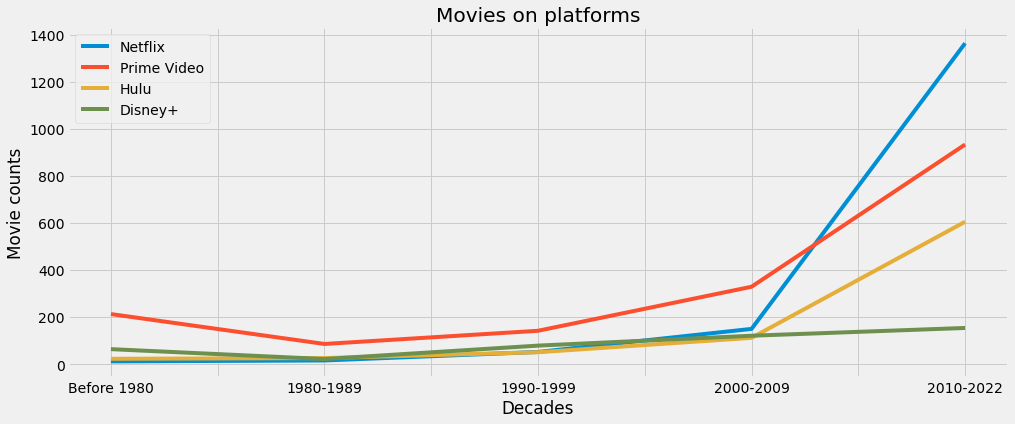

In [22]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax=movie_count_decade.plot(figsize=(15,6))
# Add a title
ax.set_title("Movies on platforms")
#  Add a x- and y-axis label.
ax.set_xlabel("Decades")
ax.set_ylabel("Movie counts")
#plt.savefig("analysis/Challenge_fare_summary.png")
plt.savefig("movies_on_platforms.png", bbox_inches="tight")
plt.show()